In [1]:
# This is my test with another method instead of decision trees 

In [2]:
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt

In [3]:
# Function to get the number of x % of a dataset 
def takeXpercentOfDataset(dataset, percent):
    n = (dataset.shape[0]*percent)/100.0
    return n

In [4]:
# Get the accuracy in % for a classification result
def getAccuracy(predictions, labels):
    """
    INPUT: predicted values of a classifier (test set); true labels of that test data set
    OUTPUT: accuracy in %
    """
    count = 0
    for i in range(0, labels.shape[0]):
        if predictions[i] == labels[i]:
            # each time the prediction matches with the actual label, the counter goes up 1 
            count = count + 1
    count = float(count)
    acc = (count/labels.shape[0])*100
    
    return acc

In [5]:
# Read in 
DATA_PATH = r"C:\Users\noemi\Noemi\UCL Master 2017 2018\Dissertation\CODE\SCRIPTS\datasets\mnist"
DATA_NAME = r"\mnist_train.csv"
data = pd.read_csv(DATA_PATH + DATA_NAME)

In [6]:
# Check the dataset (Note that these are images)
data.head()
# We see that the first column is labels, from the second on we have pixels 
data.shape
# 42,000 images in total, each image has 784 pixels (+ 1 value for label) as an 1D array, i.e. 28x28 pixels
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


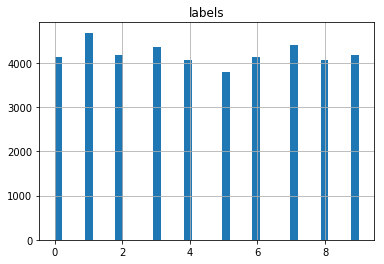

In [7]:
# Now prepare the dataset

# This tells us whether there are any nan values in the data set: False if no NAN, True if there are nan
data.isnull().values.any()
# We can add a NAN column to test it:
# data['new_col'] = np.nan
# data = data.drop('new_col', axis =1)

# Tells us how many instances of each label exist (from 0-9)
data['label'].value_counts()
# Describes the labels
data['label'].describe()
# Plot an histogram to show the data distribution
data['label'].hist(bins=40) # with 40, it just looks neater 
plt.title('labels')
plt.show()

In [8]:
data['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [9]:
data['label'].describe()

count    42000.000000
mean         4.456643
std          2.887730
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max          9.000000
Name: label, dtype: float64

# Splitting the dataset 
There are different ways to do it
1) easiest: just 20% of the data set and dont even randomly distributed 
2) shuffle the data and then take 20% randomly 
3) Stratified sampling

We then test the distribution between the overall dataset and the train (in book: test? why) dataset 

In [10]:
# Splitting the training data 

# Now make it a numpy array first before continuing with a pandas dataframe 
# Not sure if this is really necessary
# data = data.values

### First method: just 20% without shuffling the dataset 

In [11]:
n20 = takeXpercentOfDataset(data, 20)
n20 = int(n20)
data_train1 = data[n20:]
data_test1 = data[:n20]

In [12]:
data_train1['label'].describe()

count    33600.000000
mean         4.460595
std          2.887701
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max          9.000000
Name: label, dtype: float64

### Second method: 20% but with shuffling the dataset
This is a method from sklearn and it is purely random 

In [13]:
from sklearn.model_selection import train_test_split
data_train2, data_test2 = train_test_split(data, test_size=0.2, random_state=42)
# We see that this is even worse
data_train2.describe()
# The dataset is not large enough for us to just choose it randomly 
# Better: stratified sampling

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,33600.000000,33600.0,33600.0,33600.0,33600.0,33600.0,33600.0,33600.0,33600.0,33600.0,...,33600.000000,33600.000000,33600.000000,33600.000000,33600.000000,33600.000000,33600.0,33600.0,33600.0,33600.0
mean,4.455893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.232589,0.123899,0.066042,0.025238,0.021548,0.003571,0.0,0.0,0.0,0.0
std,2.888117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.689593,4.625719,3.520927,1.967568,2.118097,0.463160,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


### Third method: stratified sampling
This is the best method, as the training and test dataset should be both representative of the whole dataset. This way, we try to avoid bias. 
Important: here, we clearly have 10 classes (0-9), so we do not have to create bins, otherwise we do

In [14]:
from  sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["label"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]
strat_train_set.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,33600.000000,33600.0,33600.0,33600.0,33600.0,33600.0,33600.0,33600.0,33600.0,33600.0,...,33600.000000,33600.000000,33600.000000,33600.000000,33600.000000,33600.000000,33600.0,33600.0,33600.0,33600.0
mean,4.456458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.221607,0.115446,0.046607,0.019524,0.021548,0.003571,0.0,0.0,0.0,0.0
std,2.887713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.376796,4.649478,2.842655,1.806111,2.118097,0.463160,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,252.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [15]:
def labelProportion(dataset):
    return dataset['label'].value_counts() / len(data)

In [16]:
# This is to compare the different sampling methods directly 
compareTable = pd.DataFrame({
    'Whole dataset': labelProportion(data),
    'Simple sampling': labelProportion(data_train1),
    'Random sampling': labelProportion(data_train2),
    'Stratified sampling': labelProportion(strat_train_set)
}).sort_index()
compareTable["Simple. %error"] = 100 * compareTable["Simple sampling"] / compareTable["Whole dataset"] - 100
compareTable["Rand. %error"] = 100 * compareTable["Random sampling"] / compareTable["Whole dataset"] - 100
compareTable["Strat. %error"] = 100 * compareTable["Stratified sampling"] / compareTable["Whole dataset"] - 100
compareTable

,Random sampling,Simple sampling,Stratified sampling,Whole dataset,Simple. %error,Rand. %error,Strat. %error
0,0.078952,0.078548,0.078714,0.098381,-20.159729,-19.748306,-19.990319
1,0.089881,0.089476,0.089214,0.111524,-19.769428,-19.406490,-20.004270
2,0.079310,0.078429,0.079571,0.099452,-21.139574,-20.253771,-19.990424
3,0.081286,0.083524,0.082881,0.103595,-19.374856,-21.535279,-19.995403
4,0.076976,0.077548,0.077571,0.096952,-20.014735,-20.604126,-19.990177
5,0.073643,0.072357,0.072286,0.090357,-19.920949,-18.498024,-20.000000
6,0.079810,0.078524,0.078786,0.098500,-20.280396,-18.975103,-20.014503
7,0.083524,0.084048,0.083833,0.104786,-19.790957,-20.290843,-19.995456
8,0.076857,0.077810,0.077381,0.096738,-19.566823,-20.551317,-20.009845
9,0.079762,0.079738,0.079762,0.099714,-20.033429,-20.009551,-20.009551


### Summary of test data and training data sampling:
This has to be representative for the whole dataset 
from here on, we continue with method 3: stratified sampling: 

i.e. strat_train_set and strat_test_set

In [17]:
training_data = strat_train_set.copy()
training_data = training_data.values

testing_data = strat_test_set.copy()
testing_data = testing_data.values

# Classification 
There are different ways of classifying, here: try different types 
1) Decision trees as in video 1 (see code example: MLTest_MNIST1)
2) SVM (takes a very long time to train)
3) Random forest 

http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html 

### Classification 1: Decision trees 

DT are used for supervised learning (both regression and classification, but only CL here). 
Basically if/ else decisions 
root: the whole dataset and first node 
leaf node: the last node in a line where we do get a result

DT ask questions about the attributes we give it. The better the attributes, the better we can make decisions. It only asks yes/ no questions and goes from the root to the final leaf node. 

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
strat_labels = training_data[:,0]
strat_data = training_data[:,1:]

In [20]:
clf = DecisionTreeClassifier()
clf.fit(strat_data, strat_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [21]:
# Create test data
test_labels = testing_data[:,0]
test_images = testing_data[:,1:]
p = clf.predict([test_images[0]])
print "Predicted:", p, "True label:", test_labels[0]

Predicted: [1] True label: 1


In [22]:
# Test the accuracy 
predicted_val = clf.predict(test_images)
accDT = getAccuracy(predicted_val, test_labels)

### Classification 2: SVM
This takes really long to train 

In [23]:
from sklearn import svm

In [24]:
clf_SVM = svm.SVC() 
clf_SVM.fit(strat_data, strat_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [46]:
clf_SVM.predict([test_images[0]])

array([1], dtype=int64)

In [ ]:
# Test the accuracy 
predicted_val_SVM = clf_SVM.predict(test_images)
accSVM = getAccuracy(predicted_val_SVM, test_labels)

### Classification 3: Random forest 
Random Forest works really bad here, wow, this is really bad. The DT had 83% accuracy 

In [24]:
from sklearn.ensemble import RandomForestClassifier 

In [25]:
clf_RF = RandomForestClassifier(max_depth=2, random_state=0)
clf_RF.fit(strat_data, strat_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [26]:
# print(clf_RF.feature_importances_)

In [27]:
clf_RF.predict([test_images[0]])

array([1], dtype=int64)

In [28]:
# Test the accuracy 
predicted_val_RF = clf_RF.predict(test_images)
accRF = getAccuracy(predicted_val_RF, test_labels)

In [37]:
### Comapre the three accuracies against each other:
 
compareCLAccuracies = pd.DataFrame({
    'Decision tree': [accDT],
    'SVM': [accDT],
    'Random forest': [accRF]
}).sort_index()

compareCLAccuracies

,Decision tree,Random forest,SVM
0,85.833333,52.821429,85.833333
